## Weekly Review (2022. 09. 19 ~ 23.)
* MON : Spaceship_Titanic
* TUE : Spaceship_Titanic, Public Dataset
* WED : Spaceship_Titanic, Breast Cancer
* THU : Pilot_Project
* FRI : KNN, Linear_regressior, Redge, Lass, Decision_Tree

### Spaceship Titanic 데이터 분석
* 우주선에 승객을 보낼 때, 다른 차원 이송이 되었는지 아닌지 예측
* 데이터 출처 : https://www.kaggle.com/competitions/spaceship-titanic/data

#### 대회 개요
* 우주선 타이타닉의 승객이 다른 차원으로 이송되었는지(True=1), 아닌지(False=0)

#### 학습 내용
* 데이터에 대한 기본 탐색을 수행해봅니다.
* 데이터 결측치에 대한 처리를 수행해봅니다.
* 베이스라인 모델을 만들어봅니다.

### 01. 데이터 설명
* PassengerId : 각 승객의 고유 ID
* HomePlanet : 승객이 출발한 행성 ('Euroap', 'Earth'. 'Mars')
* CryoSleep : 승객이 항해 기간동안 정지된 애니메이션에 놓이도록 선택했는지 여부 (False, True)
* Cabin : 승객이 머물고 있는 객실 번호
* Destination : 승객이 출발할 행성 ('TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e')
* Age : 승객의 나이
* VIP : 승객이 항해 중 특별 VIP 서비스를 지불했는지 여부
* RoomService, FoodCourt, ShoppingMall : 승객이 우주선 타이타닉의 다양한 고급 편의 시설에 대해 청구한 금액
* Name : 승객의 성과 이름
* Transported : 승객이 다른 차원으로 이송되었는지 여부 (예측 대상 열)

* train.csv : 학습용 데이터 셋
* test.csv : Transported을 예측하는 것
* smaple_submission.csv : 올바른 형식의 제출 파일
    * PassengerId : 테스트 세트의 각 승객에 대한 ID
    * Transported : 목표. 각 승객이 다른 차원으로 이송되었는지 여부

### 02. 라이브러리 및 데이터 불러오기

#### 라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#### 데이터 불러오기

In [2]:
sub = pd.read_csv("./data/Space_Titanic/sample_submission.csv")
train = pd.read_csv("./data/Space_Titanic/train.csv")
test = pd.read_csv("./data/Space_Titanic/test.csv")

train.shape, test.shape, sub.shape

((8693, 14), (4277, 13), (4277, 2))

* 학습용 데이터 셋은 8,693행과 14열
* 테스트용 데이터 셋은 4,277행과 13열

In [3]:
print( train.columns, end="\n\n" )
print( test.columns )

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


### 03. 데이터 탐색

In [4]:
train['Transported'].unique()

array([False,  True])

In [5]:
test['Transported'].unique()

KeyError: 'Transported'

* test에는 예측할 컬럼이 없음. 에러가 발생

In [6]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
for one in train.columns:
    print("컬럼명 : ", one)
    print("유일한 값의 길이 및 값 : ", len( train[one].unique() ), train[one].unique(), end="\n\n" )

컬럼명 :  PassengerId
유일한 값의 길이 및 값 :  8693 ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']

컬럼명 :  HomePlanet
유일한 값의 길이 및 값 :  4 ['Europa' 'Earth' 'Mars' nan]

컬럼명 :  CryoSleep
유일한 값의 길이 및 값 :  3 [False True nan]

컬럼명 :  Cabin
유일한 값의 길이 및 값 :  6561 ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

컬럼명 :  Destination
유일한 값의 길이 및 값 :  4 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]

컬럼명 :  Age
유일한 값의 길이 및 값 :  81 [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]

컬럼명 :  VIP
유일한 값의 길이 및 값 :  3 [False True nan]

컬럼명 :  RoomService
유일한 값의 길이 및 값 :  1274 [   0.  109.   43. ... 1569. 8586.  745.]

컬럼명 :  FoodCourt
유일한 값의 길이 및 값 :  1508 [   0.    9. 3576. ... 3208. 6819. 4688.]

컬럼명 :  

##### 01. 주어진 데이터(train)를 나눈다.(학습용, 자체 평가용)
##### 02. 모델을 선택 및 학습(fit)하고, 이를 토대로 자체 평가 후 모델 최종 선택
##### 03. 마지막 선택된 모델로 test의 Transported를 예측하고 제출

### 04. 데이터 처리

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


* 결측치 O : HomePlanet, CryoSleep, Cabi, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name
* 결측치 X : PassengerId, Transported

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [10]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

* 결측치 O : HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name
* 결측치 X : PassengerId

##### 전부에 결측치 처리가 필요하다.

In [11]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

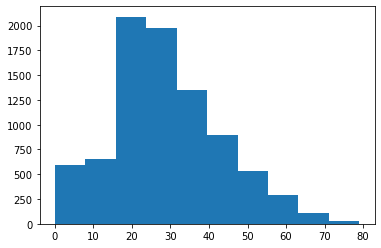

In [12]:
plt.hist(train['Age'])

##### 다른 특징들의 데이터 분포 확인해보기

(array([8.156e+03, 2.540e+02, 6.500e+01, 1.700e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1432.7,  2865.4,  4298.1,  5730.8,  7163.5,  8596.2,
        10028.9, 11461.6, 12894.3, 14327. ]),
 <BarContainer object of 10 artists>)

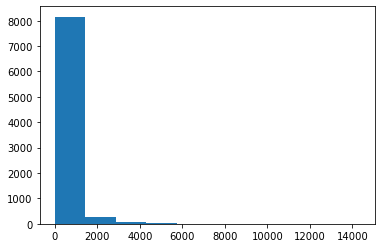

In [15]:
plt.hist(train['RoomService'])

(array([8.114e+03, 2.500e+02, 8.000e+01, 3.400e+01, 1.500e+01, 9.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([    0. ,  2981.3,  5962.6,  8943.9, 11925.2, 14906.5, 17887.8,
        20869.1, 23850.4, 26831.7, 29813. ]),
 <BarContainer object of 10 artists>)

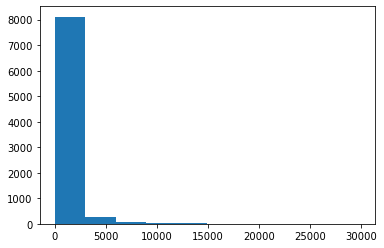

In [16]:
plt.hist(train['FoodCourt'])

(array([8.401e+03, 6.200e+01, 1.300e+01, 5.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  2349.2,  4698.4,  7047.6,  9396.8, 11746. , 14095.2,
        16444.4, 18793.6, 21142.8, 23492. ]),
 <BarContainer object of 10 artists>)

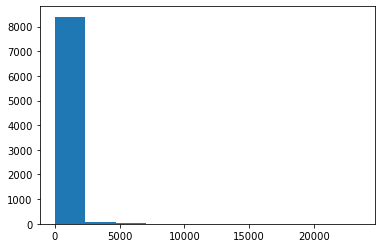

In [17]:
plt.hist(train['ShoppingMall'])

(array([8.204e+03, 1.800e+02, 7.300e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2240.8,  4481.6,  6722.4,  8963.2, 11204. , 13444.8,
        15685.6, 17926.4, 20167.2, 22408. ]),
 <BarContainer object of 10 artists>)

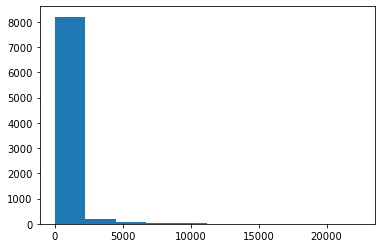

In [18]:
plt.hist(train['Spa'])

(array([8.252e+03, 1.360e+02, 6.000e+01, 2.600e+01, 1.800e+01, 7.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2413.3,  4826.6,  7239.9,  9653.2, 12066.5, 14479.8,
        16893.1, 19306.4, 21719.7, 24133. ]),
 <BarContainer object of 10 artists>)

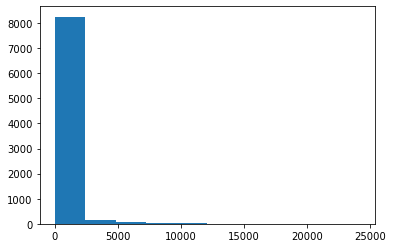

In [19]:
plt.hist(train['VRDeck'])

##### 중앙값으로 결측치를 처리해보기

In [20]:
train.loc[ train['Age'].isnull(), 'Age' ] = train['Age'].median()
train.loc[ train['RoomService'].isnull(), 'RoomService' ] = train['RoomService'].median()
train.loc[ train['FoodCourt'].isnull(), 'FoodCourt' ] = train['FoodCourt'].median()

# 비어 있는지 확인
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

##### (실습) test 데이터 셋에서도 동일하게 처리해보기

In [22]:
test.loc[ test['Age'].isnull(), 'Age' ] = test['Age'].median()
test.loc[ test['RoomService'].isnull(), 'RoomService' ] = test['RoomService'].median()
test.loc[ test['FoodCourt'].isnull(), 'FoodCourt' ] = test['FoodCourt'].median()

# 비어 있는지 확인
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [23]:
train['Transported'].unique()

array([False,  True])

In [24]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [26]:
print(train.Transported.unique())
train.head()

[False  True]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### 결측치 처리된 컬럼을 이용해보기

In [27]:
sel = ['Age', 'RoomService', 'FoodCourt']

X = train[sel]
y = train['Transported']

last_test = test[sel]

X

,Age,RoomService,FoodCourt
0,39.0,0.0,0.0
1,24.0,109.0,9.0
2,58.0,43.0,3576.0
3,33.0,0.0,1283.0
4,16.0,303.0,70.0
...,...,...,...
8688,41.0,0.0,6819.0
8689,18.0,0.0,0.0
8690,26.0,0.0,0.0
8691,32.0,0.0,1049.0


In [28]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

#### 데이터 나누기

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6085, 3), (2608, 3), (6085,), (2608,))

### 05. 첫번째 모델 만들어보기

In [30]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 7289 to 2732
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          6085 non-null   float64
 1   RoomService  6085 non-null   float64
 2   FoodCourt    6085 non-null   float64
dtypes: float64(3)
memory usage: 190.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 3601 to 5117
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2608 non-null   float64
 1   RoomService  2608 non-null   float64
 2   FoodCourt    2608 non-null   float64
dtypes: float64(3)
memory usage: 81.5 KB


(None, None)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train, y_train) )
print("테스트용 정확도 : ", model1.score(X_test, y_test) )

학습용 정확도 :  0.714215283483977
테스트용 정확도 :  0.6775306748466258


In [34]:
model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train, y_train) )
print("테스트용 정확도 : ", model2.score(X_test, y_test) )

학습용 정확도 :  0.7250616269515201
테스트용 정확도 :  0.7212423312883436


In [35]:
model3 = RandomForestClassifier(max_depth=3, random_state=0)
model3.fit(X_train, y_train)
print("학습용 정확도 : ", model3.score(X_train, y_train) )
print("테스트용 정확도 : ", model3.score(X_test, y_test) )

학습용 정확도 :  0.7175020542317173
테스트용 정확도 :  0.7051380368098159


DecisionTreeClassifier 모델이 좋아보임. 우선은 이걸로 최종 모델을 해 본다. max_depth는 최적으로 맞춰본다.

In [36]:
depth_num = range(1, 15, 1)

for num in depth_num:
    model1 = DecisionTreeClassifier(max_depth= num, random_state=0)
    model1.fit(X_train, y_train)
    
    print("max_depth 값 : ", num)
    print("학습용 정확도 : ", model1.score(X_train,y_train) )
    print("테스트용 정확도 : ", model1.score(X_test,y_test) )

max_depth 값 :  1
학습용 정확도 :  0.667378800328677
테스트용 정확도 :  0.6618098159509203
max_depth 값 :  2
학습용 정확도 :  0.7117502054231717
테스트용 정확도 :  0.7024539877300614
max_depth 값 :  3
학습용 정확도 :  0.7250616269515201
테스트용 정확도 :  0.7212423312883436
max_depth 값 :  4
학습용 정확도 :  0.7262119967132292
테스트용 정확도 :  0.7158742331288344
max_depth 값 :  5
학습용 정확도 :  0.7296631059983566
테스트용 정확도 :  0.718558282208589
max_depth 값 :  6
학습용 정확도 :  0.7336072308956451
테스트용 정확도 :  0.7105061349693251
max_depth 값 :  7
학습용 정확도 :  0.7377156943303205
테스트용 정확도 :  0.7162576687116564
max_depth 값 :  8
학습용 정확도 :  0.743303204601479
테스트용 정확도 :  0.7059049079754601
max_depth 값 :  9
학습용 정확도 :  0.7515201314708299
테스트용 정확도 :  0.7039877300613497
max_depth 값 :  10
학습용 정확도 :  0.7600657354149548
테스트용 정확도 :  0.7020705521472392
max_depth 값 :  11
학습용 정확도 :  0.7692686935086278
테스트용 정확도 :  0.6951687116564417
max_depth 값 :  12
학습용 정확도 :  0.7789646672144618
테스트용 정확도 :  0.6932515337423313
max_depth 값 :  13
학습용 정확도 :  0.7878389482333608
테스트용 정확도 :  0.69

In [37]:
last_model = DecisionTreeClassifier(max_depth= num, random_state=0)
last_model.fit(X_train, y_train)
pred = last_model.predict(last_test)
pred[0:10]

array([ True, False,  True, False, False,  True,  True,  True,  True,
       False])

In [38]:
### 제출용 파일 생성
sub.columns


Index(['PassengerId', 'Transported'], dtype='object')

In [39]:
sub['Transported'] = pred
sub.to_csv("./data/Space_Titanic/first_sub_2209.csv", index=False)

### 베이스라인 모델 점수 : Score: 0.69277

#### 실습 : 나머지 특징(피처)에 대해서도 수행해 보기
* 'ShoppingMall', 'Spa', 'VRDeck'